# Keystroke Dynamics

The datasets:

*   http://www3.cs.stonybrook.edu/~rbanerjee/project-pages/keystrokes/keystrokes.html


In [193]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import os
import tabulate
import seaborn as sns
sns.set()

# 1. Data Preparation

In [174]:
# Save temp altair json files in separate folder
os.makedirs('tmp/altdata', exist_ok=True)

def custom(data):
    return alt.pipe(data, alt.to_json(filename='tmp/altdata/{prefix}-{hash}.{extension}') )

alt.data_transformers.register('custom', custom)
alt.data_transformers.enable('custom')

DataTransformerRegistry.enable('custom')

### ! Before executing this code, make sure you've downloaded the datasets by the link and unpacked csv files to `data` directory

In [175]:
files = ('data/ReviewAMT_500_t.csv', 'data/GayMarriage_400.csv', 'data/GunControl_400.csv')
df_atm = pd.read_csv(files[0], sep='\t')
df_gay = pd.read_csv(files[1], sep='\t')
df_gun = pd.read_csv(files[2], sep='\t')

In [176]:
df_atm.rename(columns = {'ReviewTopic': 'Topic'}, inplace=True)
df_atm['Task'] = df_atm['Task'].map(
    {
        "Fake Review": 'fake', 
        "True Review": 'true',
        'Copy_1': 'copy_1',
        'Copy_2': 'copy_2'
    }) 
df_atm.head(3)

,UserName,AccessKey,ReviewDate,Topic,Task,Group,Flow,Restaurant,Addr,Site,ReviewText,ReviewMeta
0,A002160837SWJFPIAI7L7,392aa3e372054948a5cabd637b2e239b,Sun Jun 02 20:55:38 UTC 2013,AMT,copy_1,AMT,TF,NaN,NaN,NaN,Famous Daves is a good place to go for some go...,0 MouseUp 0 0;535 KeyDown 16;776 KeyDown 70;79...
1,A002160837SWJFPIAI7L7,392aa3e372054948a5cabd637b2e239b,Sun Jun 02 20:58:33 UTC 2013,AMT,copy_2,AMT,TF,NaN,NaN,NaN,The Original Shrimp Place is a good place to c...,0 MouseUp 0 0;491 KeyDown 16;778 KeyDown 84;82...
2,A002160837SWJFPIAI7L7,392aa3e372054948a5cabd637b2e239b,Sun Jun 02 20:53:01 UTC 2013,AMT,fake,AMT,TF,The Original Shrimp Place,NaN,NaN,The Original Shrimp Place is a good place to c...,0 MouseUp 0 0;849 KeyDown 16;966 KeyDown 84;10...


In [177]:
df_gay['Task'] = df_gay['Task'].map(
    {
        "Fake Essay": 'fake', 
        "True Essay": 'true',
        'Copy_1': 'copy_1',
        'Copy_2': 'copy_2'
    }) 
df_gay.head(3)

,UserName,AccessKey,Topic,Opinion,ReviewDate,ReviewType,Task,Group,Flow,ReviewText,ReviewMeta
0,A12WI1MRO70881,81a90739642349eb8f130f4e8f5e8deb,Gay Marriage,support,Thu May 30 04:08:13 UTC 2013,AMT,copy_1,AMT,FT,Gay Marriage is an oxymoron even as a concept....,0 MouseUp 0 0;878 MouseUp 0 0;1691 MouseUp 0 0...
1,A12WI1MRO70881,81a90739642349eb8f130f4e8f5e8deb,Gay Marriage,support,Thu May 30 04:14:38 UTC 2013,AMT,copy_2,AMT,FT,Marriage is about love and commitment. Its a ...,0 MouseUp 0 0;762 KeyDown 16;1160 KeyDown 77;1...
2,A12WI1MRO70881,81a90739642349eb8f130f4e8f5e8deb,Gay Marriage,support,Thu May 30 03:44:09 UTC 2013,AMT,fake,AMT,FT,Gay Marriage is an oxymoron even as a concept....,0 MouseUp 0 0;860 MouseUp 0 0;1722 MouseUp 0 0...


In [178]:
df_gun['Task'] = df_gun['Task'].map(
    {
        "Fake Essay": 'fake', 
        "True Essay": 'true',
        'Copy_1': 'copy_1',
        'Copy_2': 'copy_2'
    }) 
df_gun.head(3)

,UserName,AccessKey,Topic,Opinion,ReviewDate,ReviewType,Task,Group,Flow,ReviewText,ReviewMeta
0,A10E8QHPV30BAD,0102f02e052a473f8b5a87f42a9f6c13,Gun Control,oppose,Sat Jun 15 14:09:11 UTC 2013,AMT,copy_1,AMT,FT,I strongly support gun control being strongly ...,0 MouseUp 0 0;5309 KeyDown 16;5453 KeyDown 73;...
1,A10E8QHPV30BAD,0102f02e052a473f8b5a87f42a9f6c13,Gun Control,oppose,Sat Jun 15 14:11:57 UTC 2013,AMT,copy_2,AMT,FT,I strongly oppose gun control as I believe it ...,0 MouseUp 0 0;874 KeyDown 16;946 KeyDown 73;10...
2,A10E8QHPV30BAD,0102f02e052a473f8b5a87f42a9f6c13,Gun Control,oppose,Sat Jun 15 14:01:32 UTC 2013,AMT,fake,AMT,FT,I strongly support gun control being strongly ...,0 MouseUp 0 0;5023 KeyDown 91;5517 KeyDown 91;...


### Lets concat three datasets and leave only 5 columns

In [179]:
datasets = (df_atm, df_gay, df_gun)
df = pd.concat(
    (dataset[[
        'UserName', 
        'AccessKey', 
        'Topic', 
        'Task',
        'ReviewText', 
        'ReviewMeta'
    ]] for dataset in datasets),
    ignore_index=True)
df.head()

,UserName,AccessKey,Topic,Task,ReviewText,ReviewMeta
0,A002160837SWJFPIAI7L7,392aa3e372054948a5cabd637b2e239b,AMT,copy_1,Famous Daves is a good place to go for some go...,0 MouseUp 0 0;535 KeyDown 16;776 KeyDown 70;79...
1,A002160837SWJFPIAI7L7,392aa3e372054948a5cabd637b2e239b,AMT,copy_2,The Original Shrimp Place is a good place to c...,0 MouseUp 0 0;491 KeyDown 16;778 KeyDown 84;82...
2,A002160837SWJFPIAI7L7,392aa3e372054948a5cabd637b2e239b,AMT,fake,The Original Shrimp Place is a good place to c...,0 MouseUp 0 0;849 KeyDown 16;966 KeyDown 84;10...
3,A002160837SWJFPIAI7L7,392aa3e372054948a5cabd637b2e239b,AMT,true,Famous Daves is a good place to go for some go...,0 MouseUp 0 0;6347 KeyDown 16;6443 KeyDown 70;...
4,A0436270XG2E3RS5T61O,2746b106ea6e42efb6104f45d6b2360c,AMT,copy_1,"Being a big admirer of Italian food, I conside...",0 MouseUp 0 0;597 KeyDown 17;1093 KeyDown 17;1...


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserName    5200 non-null   object
 1   AccessKey   5200 non-null   object
 2   Topic       5200 non-null   object
 3   Task        5200 non-null   object
 4   ReviewText  5200 non-null   object
 5   ReviewMeta  5200 non-null   object
dtypes: object(6)
memory usage: 243.9+ KB


### As a result, we have 1060 unique users:

In [181]:
len(df['UserName'].unique())

1060

In [182]:
len(df['AccessKey'].unique())

1300

### Lets save the data into file

In [183]:
# df.to_csv(r'data/merged_datasets.csv', sep='\t')

# 2. Data Investigation

In [184]:
df['ReviewMeta'][59][0:400]

'0 MouseUp 0 0;16705 KeyDown 16;17170 KeyDown 16;17200 KeyDown 16;17229 KeyDown 16;17258 KeyDown 16;17287 KeyDown 16;17317 KeyDown 16;17346 KeyDown 16;17375 KeyDown 16;17404 KeyDown 16;17433 KeyDown 16;17463 KeyDown 16;17492 KeyDown 16;17521 KeyDown 16;17552 KeyDown 16;17580 KeyDown 16;17609 KeyDown 16;17630 KeyDown 73;17717 KeyUp 73;17925 KeyUp 16;18397 KeyDown 32;18528 KeyUp 32;18567 KeyDown 87;1'

### We will build two datasets: `df_dwells` and `df_transitions`. 

`dwells` will hold the times between each `KeyDown` and `KeyUp` events. 
The `transitions` dataset will represent `time` measure ('down-down time') – the time between previous key was down till the next key is down. (always positive).

In [185]:
def process_keystroke(line):
    res = line.split(' ')
    if len(res) > 3:
        return f'UNKNOWN: {line}'
    
    time, command, key = res
    return (time, command, key, chr(int(key)))

def code_to_str(keycode):
    keycode = int(keycode)
    mappings = {
        16: 'shift',
        8: 'backspace',
        32: 'space'
    }
    return mappings.get(keycode, chr(keycode))

vcode_to_str = np.vectorize(code_to_str)

def process_keystrokes(inputs, user_id, attempt_id, task_name):
    def data_row(time, code):
        return [ user_id,  time,  command,  code, attempt_id, task_name ]
    
    def dwell_row(time, code):
        return [ user_id,  time,  code, attempt_id, task_name ] 
    
    def transition_row(time, code1, code2):
        return [ user_id,  time,  code1, code2, attempt_id, task_name ]
            
    MOUSE_UP = 'MouseUp'
    KEY_DOWN = 'KeyDown'
    KEY_UP = 'KeyUp'
    result = []
    dwells = []
    transitions = []
    key_downs = {}
    key_ups = {}
    attempt_id = int(attempt_id)
    last_key_up = None
    last_key_down = None
    
    for keystroke in inputs.split(';'):
        res = keystroke.split(' ')
        
        if len(res) < 3:
            continue
            
        if res[1] == 'MouseUp':
            continue

        time, command, code = res
        time = int(time)
        code = int(code)
        
        if command == KEY_DOWN:
            key_downs[code] = time
            
            if last_key_down:
                last_down_code, last_down_time = last_key_down
                timeshift = time - last_down_time 
                transitions.append(transition_row(timeshift, last_down_code, code))
                
            last_key_down = [code, time]
            
        if command == KEY_UP:
            if code in key_downs:
                timeshift = time - key_downs[code]
                dwells.append(dwell_row(timeshift, code))
                del key_downs[code]
                last_key_up = [code, time]
            
        result.append(data_row(time, code))
        
    return result, dwells, transitions

vprocess_keystrokes = np.vectorize(process_keystrokes)

def process_data(df):
    results = []
    dwell_data = []
    transitions_data = []
    columns = ['user_id', 'time', 'command', 'code', 'attempt_id', 'task_name']
    for index, inputs in df.iterrows():
        all_keystrokes, dwells, transitions  = process_keystrokes(
            inputs['ReviewMeta'], 
            inputs['UserName'], 
            index, 
            inputs['Task']
        )
        results.extend(all_keystrokes)
        dwell_data.extend(dwells)
        transitions_data.extend(transitions)
    return \
        pd.DataFrame(dwell_data, columns=['user_id', 'time', 'code', 'attempt_id', 'task_name']), \
        pd.DataFrame(results, columns=['user_id', 'time', 'command', 'code', 'attempt_id', 'task_name']), \
        pd.DataFrame(transitions_data, columns=['user_id', 'time', 'code_from', 'code_to', 'attempt_id', 'task_name']) 

In [203]:
df_dwells_raw, df_all_raw, df_transitions_raw = process_data(df)
df_dwells_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4568673 entries, 0 to 4568672
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   user_id     object
 1   time        int64 
 2   code        int64 
 3   attempt_id  int64 
 4   task_name   object
dtypes: int64(3), object(2)
memory usage: 174.3+ MB


In [204]:
df_dwells_raw.head(3)

,user_id,time,code,attempt_id,task_name
0,A002160837SWJFPIAI7L7,260,16,0,copy_1
1,A002160837SWJFPIAI7L7,192,70,0,copy_1
2,A002160837SWJFPIAI7L7,127,65,0,copy_1


### Now, add a human interperation of the key code

In [188]:
df_all_raw['key'] = vcode_to_str(df_all_raw['code'])

In [125]:
df_all_raw.head()

,user_id,time,command,code,attempt_id,task_name,key
0,A002160837SWJFPIAI7L7,535,KeyDown,16,0,copy_1,shift
1,A002160837SWJFPIAI7L7,776,KeyDown,70,0,copy_1,F
2,A002160837SWJFPIAI7L7,795,KeyUp,16,0,copy_1,shift
3,A002160837SWJFPIAI7L7,924,KeyDown,65,0,copy_1,A
4,A002160837SWJFPIAI7L7,968,KeyUp,70,0,copy_1,F


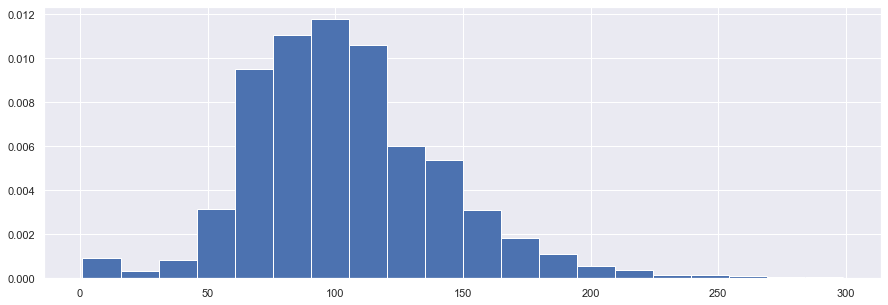

In [205]:
# alt.Chart(df_dwells).mark_bar().encode(
#     alt.X("time:Q", bin=alt.Bin(maxbins=50), axis=alt.Axis(title='Time (ms)')),
#     y=alt.Y('count()', axis=alt.Axis(title=None))
# ).transform_filter(
#     'datum.time > 0 & datum.time < 300'
# ).properties(
#     width=800, title='Dwells time distribution'
# )
plt.figure(figsize=(15, 5))
df_dwells = df_dwells_raw.loc[(df_dwells_raw['time'] > 0) & (df_dwells_raw['time'] < 300)]
plt.hist(df_dwells['time'], bins=20, density=True)
plt.show()

In [206]:
df_dwells.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4542191 entries, 0 to 4568672
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   user_id     object
 1   time        int64 
 2   code        int64 
 3   attempt_id  int64 
 4   task_name   object
dtypes: int64(3), object(2)
memory usage: 207.9+ MB


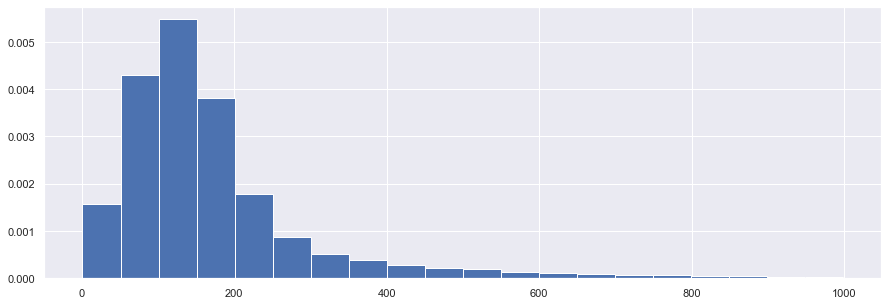

In [216]:
# alt.Chart(df_transitions).mark_bar().encode(
#     alt.X("time:Q", bin=alt.Bin(maxbins=50), axis=alt.Axis(title='Time (ms)')),
#     y=alt.Y('count()', axis=alt.Axis(title=None))
# ).transform_filter(
#     'datum.time > 0 & datum.time < 1700'
# ).properties(width=800, title='Transition time distribution')

plt.figure(figsize=(15, 5))
df_transitions = df_transitions_raw.loc[(df_transitions_raw['time'] > 0) & (df_transitions_raw['time'] < 1000)]
plt.hist(df_transitions['time'], bins=20, density=True)
plt.show()

In [217]:
df_all.groupby('key').count()['command']

key
       115
\t     294

        2
\r    5801
     3711
      ... 
á        2
â        8
é       97
ü     9776
ÿ       38
Name: command, Length: 108, dtype: int64

In [218]:
def grouped_by_key(df):
    values = []
    for index, row in df.iterrows():
        values.append({'key': index, 'counter': int(row['command'])})
    return values
grouped_data = grouped_by_key(df_all.groupby('key').count())
grouped_df = alt.Data(values = grouped_data)

alt.Chart(grouped_df).mark_bar().encode(
 x = 'counter:Q',
 y = alt.Y('key:O', sort = alt.Sort(field = 'counter', order='descending')),
).transform_filter('datum.counter > 2000')

alt.Chart(...)

In [220]:
def chart_for_user(user_id):
    return alt.Chart(df_dwells.loc[df_dwells['user_id'] == user_id]).mark_bar().encode(
        x = alt.X('mean(time):Q', scale=alt.Scale(domain=[0, 200])),
        y = alt.Y('code:O', sort = 'ascending')
    )

In [221]:
chart_for_user('A12TA2E23C9YGK')

alt.Chart(...)

In [222]:
#df_dwells['user_id'].unique()
chart_for_user('A1IAK1JCYVR3R5')

alt.Chart(...)